# Задания для самостоятельного решения


<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

In [1]:
Sigma = 225**(0.5)  # Стандартное отклонение - положительный квадратный корень из дисперсии
Delta = 3 # Желаемая точность
a = 1-0.95 # Уровень значимости 1 - 𝛽
b = 1-a/2 # Уровень ???
# print(b)
Z = 2.241 # Квантиль нормального распределения. (Я взял его из таблицы в презентации - уровень 0.975)

n = int(((Sigma*Z)/Delta)**2)  # Запишите в эту переменную ваш высчитанный ответ!
n

125

<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

In [2]:
a = 1-0.98 # Уровень значимости 1 - 𝛽
n = 25 # Объем выборки
b = 1-a/2 # Уровень ???
# print(b)
Z = 2.576 # Квантиль нормального распределения. (Я взял его из таблицы в презентации)
Mean = 130
Sigma = 15

Delta = (Sigma/(n**(0.5)))*Z # Находим точность
X1 = n-Delta
X2 = n+Delta

L = int(X2 - X1) # Запишите в эту переменную ваш высчитанный ответ!
L

15

### 2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

In [3]:
import numpy as np
import scipy.stats as stats

np.random.seed(42) # Фиксация случайности

mens  = stats.norm.rvs(loc=171, scale=100, size=150000)  # Выборка мужчин со средним ростом 171
womens = stats.norm.rvs(loc=170, scale=100, size=150000)  # Выборка женщин со средним ростом 170

# В двух строчках выше генерируется две выбороки, где loc это среднее значение, а scale это дисперсия

# H0 - различий между выборками незначительно

a = 0.001

t, p_value = stats.ttest_ind(mens, womens) # Критерий Стьюдента (t-test)

if p_value > a:
    print('Гипотеза о существенном различие между выборками по мужчинам и женщинам подтверждена. P-value равно: ', round(p_value, 5))
else:
    print('Гипотеза о существенном различие между выборками по мужчинам и женщинам не подтверждена. P-value равно: ', round(p_value, 5))

Гипотеза о существенном различие между выборками по мужчинам и женщинам не подтверждена. P-value равно:  0.00025


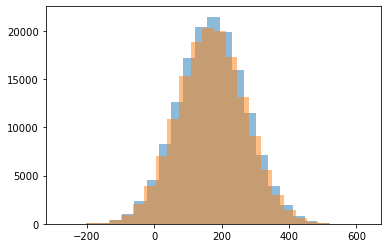

In [4]:
import matplotlib.pyplot as plt

plt.hist(mens, bins=25, alpha=0.5); # Выборка mens
plt.hist(womens, bins=25, alpha=0.5);  # Выборка womens

### 3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [5]:
Sigma = 150  # Стандартное отклонение - положительный квадратный корень из дисперсии
Delta = 50 # Желаемая точность
a = 1-0.95 # Уровень значимости 1 - 𝛽
b = 1-a/2 # Уровень ???
#print(b)
Z = 2.241 # Квантиль нормального распределения. (Я взял его из таблицы в презентации - уровень 0.975)

n = int(((Sigma*Z)/Delta)**2)  # Запишите в эту переменную ваш высчитанный ответ!
n

45

<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [6]:
import pandas as pd

observations = pd.DataFrame([[10, 15],[39, 34]],
                            index=['Дождь','Солнце'],
                            columns=['Верные ответы волшебника','Неверные ответы'])
observations

,Верные ответы волшебника,Неверные ответы
Дождь,10,15
Солнце,39,34


In [7]:
# Учтите, что у стат. тестов, в том числе и точного теста Фишера под нулевой гипотезой подразумевается случайность/отсутсвие эффекта

# H0 - волшебник не умеет предсказывать погоду

oddsratio, pvalue = stats.fisher_exact(observations) # Возможно пригодится эта функция. - допустим она пригодилась один в один
oddsratio, pvalue

# Если сам код уже написан, то нужно просто сделать вывод?

a = 0.05

if pvalue > a:
    print('P-value (', round(pvalue, 2),') больше чем уровень значимости (', a, ') - эффект случайный: маг - шарлатан!');
elif pvalue == a:
    print('P-value (', round(pvalue, 2),') равен уровню значимости (', a, ') - эффект неоднозначный: понаблюдаем еще?');
else:
    print('P-value (', round(pvalue, 2),') меньше уровня значимости (', a, ') - эффект неслучайный: мага не врет!')


P-value ( 0.35 ) больше чем уровень значимости ( 0.05 ) - эффект случайный: маг - шарлатан!


<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [8]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence)/2, n)
    return m-h, m, m+h 

mean_confidence_interval(data, confidence=0.90) # Устанавливаем наш уровень доверия 0.9

(6.074074746111319, 6.628571428571429, 7.183068111031539)

<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки `A` и `B` одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [9]:
A = [4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4]

B = [5,6,7,8,4,6,7,2,6,5,7,5,3,5,3,
    5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    3,4,4,1,2,4,3,2,4,3,2,1,5,3,4,6,
    3,2,4,5,6,4,3,3,5,3,4,4,4,2,5,3]

In [10]:
# HO - выборки не принадлежат к одному множеству

t, p_value = stats.ttest_ind(A, B) # Критерий Стьюдента (t-test)
t, p_value

a = 0.05 # Установим уровень значимости

if pvalue > a:
    print('P-value (', round(p_value, 3),') больше чем уровень значимости (', a, ') - выборки не принадлежат к одному множеству');
elif pvalue == a:
    print('P-value (', round(p_value, 3),') равен уровню значимости (', a, ') - результат неоднозначный');
else:
    print('P-value (', round(p_value, 3),') меньше уровня значимости (', a, ') - выборки принадлежат к одному множеству')

P-value ( 0.0 ) больше чем уровень значимости ( 0.05 ) - выборки не принадлежат к одному множеству


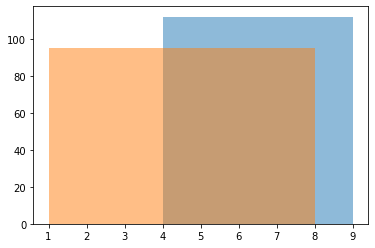

In [11]:
plt.hist(A, bins=1, alpha=0.5); # Выборка A
plt.hist(B, bins=1, alpha=0.5);  # Выборка B

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

In [12]:
# Результат зависит от уровня значимости - a, чем более низкий порог мы выберем тем более очевидна разница в интерпретации:

# Если a == 0.05, то мы примнимаем нашу альтернативную гипотезу т.к. p-value меньше a

# Если a == 0.01, то мы отвергаем нашу альтернативную гипотезу т.к. p-value больше a

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [13]:
np.random.seed(11)
A = stats.norm.rvs(scale=15, loc=169, size=300)
B = stats.norm.rvs(scale=14, loc=171.4, size=300)

# H0 - значимого различия нет, различия случайны

a = 0.05

t, p_value = stats.ttest_ind(A, B) #Критерий Стьюдента (t-test)
t, p_value

if pvalue > a:
    print('P-value (', round(p_value, 3),') больше чем уровень значимости (', a, ') - различия случайны');
elif pvalue == a:
    print('P-value (', round(p_value, 3),') равен уровню значимости (', a, ') - результат неоднозначный');
else:
    print('P-value (', round(p_value, 3),') меньше уровня значимости (', a, ') - имеется значимое различие')

P-value ( 0.051 ) больше чем уровень значимости ( 0.05 ) - различия случайны


In [14]:
# Очевидно, что при p-value ниже уровня значимости уже можно говорить о подтверждении гипотезы H1
# Чем p-value меньше тем более вероятно это различие

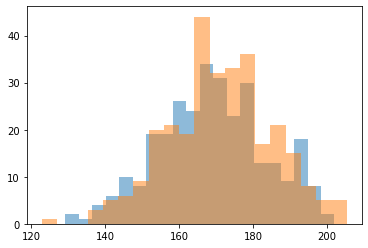

In [15]:
plt.hist(A, bins=20, alpha=0.5); # Выборка A
plt.hist(B, bins=20, alpha=0.5);  # Выборка B